Jak stworzyć własny environment ?

    Aby stworzyć swój własny environment trzeba pamiętać o tych dwóch rzeczach
 
- Przestrzeń 
    Każdy agent musi mieć przestrzeń w której się porusza. Jest to poprostu macierz możliwości

- Akcje
    Akcje to ruchy jakie może wykonać agent np prawo, lewo, skok, przyspieszenie
    
    
    
Na co składa się środowisko 



Kroki w budowaniu własnego środowiska z RL

1) Stałe:
    - "STATE_SPACE" --> czyli przestrzeń w której się porusza agent
    - "STATE_ACTION" --> czyli możliwe akcje w jakie może wykonać agent
    - "EPSILON" --> czyli parametr określający czy powinniśmy eksplorować
        czy iść w strone największego stanu 
        Im większy epsilon tym greedy jest większy
    - "ALPHA" --> jest to parametr określający uczenie
    - "GAMMA"
    - "MAX_EPISODES --> ilość maksymalnej ilości episodów które będzie 
                wykonywał algorytm. Jeden episod jest to jedna pętla w której
                zachodzi nauka i kończy się wtedy jeżeli agent otrzyma 
                nagrodę albo będzie trwała zbyt dużą liczbę kroków
    
2) Funkcja build_qtable
    Buduje tablice 2D z zer ze wszystkimi możliwosciami stanów i akcji agenta. 

3) Funkcja choose_action
    Ta funkcja odpowiada za wybranie ruchu agenta oraz za 


4) Funkcja interaction
    Ta funkcja odpowiada za odpowiednia reakcje zależnego od podjętej akcji i aktualnego stanu w środowisku
    
    
5) Funckcja environment
    Odpowiada za wyświetlenie czlowiekowi aktualnego stanu agenta.
    
    
    
 


In [2]:
import time
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
    STATE_SPACE = 6 # ilość stanów w jednym świecie
    STATE_ACTION = 2
    EPSILON = 1.0
    LEARNING_RATE = 0.7
    GAMMA = 0.99
    MAX_EPSILON = 1.0 #Exploration probability at start
    MIN_EPSILON= 0.01 #minimum exploration probability
    DECAY_RATE = 0.01 #exponential decay rate for exploration probability

In [6]:
class OneWayTresure:
    
        
    
    def __init__(self,STATE_SPACE,STATE_ACTION):
        self.STATE_SPACE = STATE_SPACE
        self.STATE_ACTION = STATE_ACTION
        
    def build_qtable(self):
        """build_qtable function make a 2D table with the all possible states"""
        q_table = np.zeros((self.STATE_SPACE , self.STATE_ACTION)) # tworzy matryce zer
        return q_table
    
    def choose_action(self, state):
        """choose_action take a random action or take maximal value in the actual state"""
        actions = q_table[state,:]
        print(actions)
        if (np.random.uniform()>EPSILON) or (actions.all()==0):
            action_choose = np.random.choice(STATE_ACTION)
        else:
            action_choose = actions.argmax()
        return action_choose

    def interaction(self,state,action):
        """interaction function decide for ouput from your actual action"""
        if action == 1:
            if state == 3:
                reward = 1
                new_state = 0
                
            else:
                new_state = state + 1
                reward = 0
    
        else: 
            reward = 0
            if state == 0:
                new_state = state
        
            else: new_state = state - 1
                
        return reward, new_state
    
    def environment(self,new_state):
        """This function is only output for human where is agent in the environment. In thi function could be all possible 
        output what you imagine but you have to change yourself xd or tell me idea"""
        env = ["-"] * (STATE_SPACE- 2) + ["T"]
        env[new_state] = "o"
        
        return env

Zapisywanie danych

In [7]:
#Inizjalizacja tabeli danych
df = pd.DataFrame( columns = ['time' , 'reward'])
df

,time,reward


In [10]:
df

,time,reward,action,episode,q_value,qumulative_reward,state
0,1,0,0.0,0.0,"[[0.16144737140069992, 3.110133345164999], [0....",0.0,0.0
1,2,0,0.0,0.0,"[[0.16144737140069992, 3.110133345164999], [0....",0.0,0.0
2,3,0,0.0,0.0,"[[0.16144737140069992, 3.110133345164999], [0....",0.0,0.0
3,4,0,1.0,0.0,"[[0.16144737140069992, 3.110133345164999], [0....",0.0,1.0
4,5,0,1.0,0.0,"[[0.16144737140069992, 3.110133345164999], [0....",0.0,2.0
5,6,0,0.0,0.0,"[[0.16144737140069992, 3.110133345164999], [0....",0.0,1.0
6,7,0,1.0,0.0,"[[0.16144737140069992, 3.110133345164999], [0....",0.0,2.0
7,8,0,1.0,0.0,"[[0.16144737140069992, 3.110133345164999], [0....",0.0,3.0
8,9,1,1.0,0.0,"[[0.16144737140069992, 3.110133345164999], [0....",1.0,0.0
9,10,0,1.0,1.0,"[[0.16144737140069992, 3.110133345164999], [0....",1.0,1.0


In [9]:
RL = OneWayTresure(5,2) #Inicjalizacja obiektu
q_table = RL.build_qtable() #Inicjalizacja puset tablicy q_table



Time = 0
reward_data = 0 
qumulative_reward = 0
for episode in range(5):
    
    state = 0
    terminate= False
    cumulative_rewards_per_episode = []
    
    while not terminate: 
        print('start episode {}'.format(episode))
        
        Time = Time + 1 
        print(Time)
        clear_output(wait=True)
        time.sleep(0.5)    

        action =  RL.choose_action(state)
            
        reward , new_state = RL.interaction(state, action)
        qumulative_reward += reward
            
        if state != 3:
            q_target = reward + GAMMA * q_table[new_state, :].max()   # next state is not terminal
               
        else:
                  # next state is terminal
            terminate = True # terminate this episode
            print("WIN")
                
                
                
                
        q_table[state,action] += q_table[state,action] * (1 - LEARNING_RATE)+ LEARNING_RATE *(reward +GAMMA * np.max(q_table[new_state,:]) )

            
            
        env = RL.environment(new_state)
        state = new_state
            
            
        df =  df.append({'time' : Time ,'episode':episode,'reward' : reward,'state':state , 'action': action , "q_value": q_table,"qumulative_reward":qumulative_reward } , ignore_index=True)

         
        print(env, state,action,reward,q_table)
        print("new_state: " , new_state)
        print("rewards: ",reward_data)



[0.3361743  3.58409212]
WIN
['o', '-', '-', '-', 'T'] 0 1 1 [[0.16144737 3.11013335]
 [0.16144737 4.82880765]
 [0.83868764 5.81980854]
 [0.3361743  7.51464216]
 [0.         0.        ]]
new_state:  0
rewards:  0


1. [x] Plotting state in time

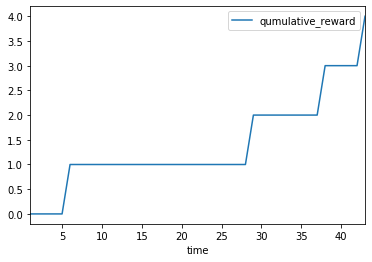

In [107]:
#Plot 1

df.plot(x = "time",y = "qumulative_reward")


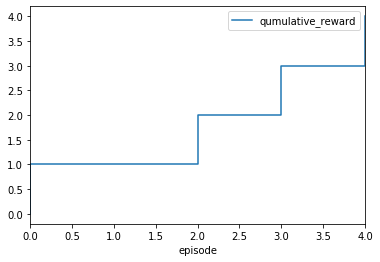

In [11]:
#plot 2
#qumulative reward in the episode

df.plot(x = "episode",y = "qumulative_reward")